<div style="font-family: 'Pacifico', cursive; text-align: center; font-size: 70px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;
            background: radial-gradient(circle, #1C1C1C, #000000); padding: 40px; border-radius: 30px; 
            border: 7px solid #DA70D6; box-shadow: 0 0 30px #DA70D6;">
    Modelo de Puntuación Crediticia
</div>

<div style="font-family: 'Pacifico', cursive; text-align: right; font-size: 20px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    Brizuela Casarín Ana Sofía
</div>

<div style="font-family: 'Pacifico', cursive; text-align: right; font-size: 20px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    Enriquez Nares Diego Emilio
</div>

<div style="font-family: 'Pacifico', cursive; text-align: right; font-size: 20px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    Mugica Liparoli Juan Antonio
</div>

<div style="height: 5px; background: #DA70D6; box-shadow: 0 0 10px #DA70D6; margin: 20px 0;"></div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 15px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    LIBRERÍAS
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

<div style="height: 5px; background: #DA70D6; box-shadow: 0 0 10px #DA70D6; margin: 20px 0;"></div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;
            background: radial-gradient(circle, #1C1C1C, #000000); padding: 40px; border-radius: 30px; 
            border: 7px solid #DA70D6; box-shadow: 0 0 30px #DA70D6;">
    EDA class
</div>

In [2]:
class EDA:
    """
    Class for performing exploratory data analysis (EDA) on a given dataset.
    """

    def __init__(self, data):
        """
        Initializes the EDA object with the provided data.

        Parameters:
        data (pd.DataFrame): The DataFrame to be analyzed.

        Raises:
        ValueError: If the DataFrame is empty.
        """

        self.validate_data(data)
        self.data = data
        self.number_columns = self.data.select_dtypes(include=['number']).columns
        self.object_columns = self.data.select_dtypes(include=['object']).columns
        self.numeric_data = self.data[self.number_columns]
        self.categorical_data = self.data[self.object_columns]
        self.n_cols = 4
        self.target_column = 'Credit_Score'

        # ----------

        sns.set(style="whitegrid")
        sns.set_palette("pastel")

    # ------------------------------

    def validate_data(self, data):
        """
        Validates the input DataFrame.

        Parameters:
        data (pd.DataFrame): The DataFrame to validate.

        Raises:
        ValueError: If the DataFrame is empty.
        """

        if data.empty:
            raise ValueError("DataFrame must be not empty.")

    # ------------------------------

    def data_summary(self):
        """
        Summarizes the dataset by displaying its head, tail, shape, columns,
        data types, unique values, missing values, and outliers.
        """

        try:
            print("\nHead:")
            print(self.data.head(5))

            print("\nTail:")
            print(self.data.tail(5))

            print("\nShape:")
            print(self.data.shape)

            print("\nColumns:")
            print(len(self.data.columns))
            print(self.data.columns)

            print("\nData Types:")
            print(self.data.dtypes)

            print("\nNumeric columns:")
            print(len(self.number_columns))
            print(self.number_columns)

            print("\nObject columns:")
            print(len(self.object_columns))
            print(self.object_columns)

            print("\nUnique values:")
            for col in self.data.columns:
                unique_values = self.data[col].nunique()
                print(f"{col}: {unique_values}")

                if unique_values < 20:
                    print(f"Labels in {col}: {sorted(self.data[col].unique())}")

            print("\nInformation:")
            print(self.data.info())

            print("\nDescribe:")
            print(self.data.describe())

            print("\nMissing values:")
            print(self.data.isnull().sum())

            print("\nOutliers:")
            for col in self.number_columns:
                if self.data[col].dtype in ['int64', 'float64']:
                    z_scores = np.abs(stats.zscore(self.data[col].dropna()))
                    print(f"Outliers in {col}: {np.where(z_scores > 3)}")
    
        except Exception as e:
            print(f"Error during the data summary: {e}")

    # ------------------------------

    def data_statistics(self):
        """
        Calculates and displays various statistics for numeric columns in the dataset.
        """

        try:
            print("\nMean:")
            print(self.numeric_data.mean())

            print("\nMean:")
            print(self.numeric_data.mean())

            print("\nMedian:")
            print(self.numeric_data.median())

            print("\nMode:")
            print(self.numeric_data.mode().iloc[0])

            print("\nMinimum:")
            print(self.numeric_data.min())

            print("\nMaximum:")
            print(self.numeric_data.max())

            print("\nVariance:")
            print(self.numeric_data.var())

            print("\nStandard Deviation:")
            print(self.numeric_data.std())

        except Exception as e:
            print(f"Error during the data statistics: {e}")

    # ------------------------------

    def setup_subplots(self, data_columns, plot_type, title_prefix, hue=None, anaysis=None):
        """
        Sets up subplots for visualizations.

        Parameters:
        data_columns (list): List of columns to visualize.
        plot_type (str): Type of plot ('hist', 'box', 'count', or 'violin').
        title_prefix (str): Prefix for the plot title.
        hue (str, optional): Variable to color by.
        analysis (str, optional): Analysis type to determine count plot behavior.
        """

        n_rows = (len(data_columns) + self.n_cols - 1) // self.n_cols

        if n_rows == 0:
            print("No rows to plot.")
            return
    
        fig, axs = plt.subplots(n_rows, self.n_cols, figsize=(self.n_cols * 5, n_rows * 5))

        for i, col in enumerate(data_columns):
            ax = axs[i // self.n_cols, i % self.n_cols]

            try:
                if plot_type == 'hist':
                    sns.histplot(self.data[col], bins=30, kde=True, ax=ax, color='skyblue')
                
                elif plot_type == 'box':
                    sns.boxplot(x=self.data[col], ax=ax, color='lightgreen')
                
                elif plot_type == 'count':
                    if anaysis == 'yes':
                        sns.countplot(x=col, data=self.data, ax=ax, hue=hue, palette='viridis', legend=False)

                    else:
                        sns.countplot(x=col, data=self.data, ax=ax, hue=self.data[col], palette='viridis', legend=False)

                elif plot_type == 'violin':
                    sns.violinplot(x=self.target_column, y=self.data[col], data=self.data, ax=ax, palette='pastel', hue=self.target_column)

                ax.set_title(f'{title_prefix} {col}', fontsize=14)
                ax.set_xlabel('')
                ax.set_ylabel('Count' if plot_type == 'count' else 'Value')

            except Exception as e:
                print(f"Error plotting {col}: {e}")

        for j in range(i + 1, n_rows * self.n_cols):
            fig.delaxes(axs[j // self.n_cols, j % self.n_cols])

        plt.tight_layout()
        plt.show()

    # ------------------------------

    def plot_count_plots(self):
        """
        Plots count plots for categorical columns with less than 20 unique values.
        """

        filtered_object_columns = [col for col in self.object_columns if self.data[col].nunique() < 20]
        self.setup_subplots(filtered_object_columns, 'count', 'Count of')

    # ------------------------------

    def plot_histograms(self):
        """
        Plots histograms for numeric columns.
        """

        self.setup_subplots(self.number_columns, 'hist', 'Distribution of')

    # ------------------------------

    def plot_box_plots(self):
        """
        Plots box plots for numeric columns.
        """

        self.setup_subplots(self.number_columns, 'box', 'Box plot of')

    # ------------------------------

    def plot_correlation_matrix(self):
        """
        Plots a heatmap of the correlation matrix for numeric columns.
        """

        try:
            plt.figure(figsize=(12, 8))
            sns.heatmap(self.numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
            plt.title('Correlation Matrix:', fontsize=16)
            plt.show()

        except Exception as e:
            print(f"Error plotting correlation matrix: {e}")

    # ------------------------------

    def plot_histograms_bivariates(self):
        """
        Plots count plots for categorical columns compared to the target column.
        """

        filtered_object_columns = [col for col in self.object_columns if col != self.target_column and self.data[col].nunique() < 20]

        self.setup_subplots(filtered_object_columns, 'count', f'{self.target_column} VS', self.target_column, 'yes')

    # ------------------------------

    def plot_violins(self):
        """
        Plots violin plots for numeric columns against the target column.
        """

        self.setup_subplots(self.number_columns, 'violin', f'{self.target_column} VS', self.target_column)

    # ------------------------------

    def perform_EDA(self):
        """
        Performs the complete exploratory data analysis process.
        """

        self.data_summary()
        self.data_statistics()
        self.plot_count_plots()
        self.plot_histograms()
        self.plot_box_plots()
        self.plot_correlation_matrix()
        self.plot_histograms_bivariates()
        self.plot_violins()

<div style="height: 5px; background: #DA70D6; box-shadow: 0 0 10px #DA70D6; margin: 20px 0;"></div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;
            background: radial-gradient(circle, #1C1C1C, #000000); padding: 40px; border-radius: 30px; 
            border: 7px solid #DA70D6; box-shadow: 0 0 30px #DA70D6;">
    DQR class
</div>

In [3]:
class DQR:
    """
    Class for data quality review (DQR) and preprocessing of a given dataset.
    """

    def __init__(self, data):
        """
        Initializes the DQR object with the provided data.

        Parameters:
        data (pd.DataFrame): The DataFrame to be cleaned.

        Raises:
        ValueError: If the DataFrame is empty.
        """

        self.validate_data(data)
        self.data = data

    # ------------------------------

    def validate_data(self, data):
        """
        Validates the input DataFrame.

        Parameters:
        data (pd.DataFrame): The DataFrame to validate.

        Raises:
        ValueError: If the DataFrame is empty.
        """

        if data.empty:
            raise ValueError("DataFrame must be not empty.")

    # ------------------------------

    def preprocess_data(self):
        """
        Drops specific columns that are not needed for analysis.
        """

        try:
            self.data = self.data.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'])

        except KeyError as e:
            print(f"Error dropping columns: {e}")

    # ------------------------------

    def clean_incoherent_values(self):
        """
        Cleans incoherent values in specific columns by replacing them with NaN
        and filling NaN values with the mode of the respective column.
        """

        try:
            replacements = {
                'Occupation': {'_______': np.nan},
                'Credit_Mix': {'_': np.nan},
                'Payment_Behaviour': {'!@9#%8': np.nan}
            }
            self.data.replace(replacements, inplace=True)

            for key in replacements.keys():
                self.data[key] = self.data[key].fillna(self.data[key].mode().iloc[0])

        except Exception as e:
            print(f"Error cleaning incoherent values: {e}")

    # ------------------------------

    def convert_time_to_numeric(self):
        """
        Converts the 'Credit_History_Age' column from string format to numeric years.
        """

        try:
            if self.data['Credit_History_Age'].dtype != 'object':
                self.data['Credit_History_Age'] = self.data['Credit_History_Age'].astype(str)    

            years = self.data['Credit_History_Age'].str.extract(r'(\d+)\sYears').astype(float)
            months = self.data['Credit_History_Age'].str.extract(r'(\d+)\sMonths').astype(float)
            
            self.data['Credit_History_Age'] = years + (months / 12)

        except Exception as e:
            print(f"Error converting time to numeric: {e}")

    # ------------------------------

    def clean_data_types(self):
        """
        Cleans data types by converting non-numeric values in specified columns to numeric.
        """

        try:
            object_to_numeric_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

            non_numeric_columns = self.data.columns[~self.data.columns.isin(object_to_numeric_columns)]

            for column in non_numeric_columns:
                if self.data[column].dtype == 'object':
                    self.data[column] = self.data[column].str.replace('_', '')
                    self.data[column] = pd.to_numeric(self.data[column], errors='coerce')

        except Exception as e:
            print(f"Error cleaning data types: {e}")

    # ------------------------------

    def handle_outliers(self):
        """
        Handles outliers in the dataset by clipping values outside the IQR.
        """

        try:
            for col in self.data.select_dtypes(include=['number']).columns:
                Q1 = self.data[col].quantile(0.25)
                Q3 = self.data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                self.data[col] = self.data[col].clip(lower=lower_bound, upper=upper_bound)

        except Exception as e:
            print(f"Error handling outliers: {e}")

    # ------------------------------

    def handle_missing_values(self):
        """
        Fills missing values in the dataset with median for numeric columns and mode for categorical columns.
        """

        try:
            for column in self.data.columns:
                if self.data[column].dtype in ['float64', 'int64']:
                    self.data[column] = self.data[column].fillna(self.data[column].median())

                elif self.data[column].dtype == 'object':
                    self.data[column] = self.data[column].fillna(self.data[column].mode().iloc[0])

        except Exception as e:
            print(f"Error handling missing values: {e}")
            
    # ------------------------------

    def encode_categorical(self):
        """
        Encodes categorical variables using label encoding.
        """

        try:
            encoder = LabelEncoder()
            for column in self.data.select_dtypes(include=['object']).columns:
                self.data[column] = encoder.fit_transform(self.data[column].astype(str))

        except Exception as e:
            print(f"Error encoding categorical variables: {e}")

    # ------------------------------

    def replace_negatives(self):
        """
        Replaces negative values in specified columns with the median of each column.
        """

        columns_to_check = [
            "Age",
            "Num_Bank_Accounts",
            "Num_Credit_Card",
            "Num_of_Loan",
            "Delayd_from_due_date",
            "Num_of_Delayed_Payment",
            "Changed_Credit_Limit",
            "Monthly_Balance"
        ]

        try:
            for col in columns_to_check:
                if col in self.data.columns:
                    median_value = self.data[col].median()
                    self.data[col] = self.data[col].where(self.data[col] >= 0, median_value)

        except Exception as e:
            print(f"Error replacing negative values: {e}")

    # ------------------------------

    def postprocess_data(self):
        """
        Postprocesses the cleaned data, converting columns to appropriate types and removing duplicates.
        """

        try:
            int_columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
                        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
            self.data[int_columns] = self.data[int_columns].astype('int')

            self.data = self.data.drop_duplicates()

        except Exception as e:
            print(f"Error during postprocessing: {e}")

    # ------------------------------

    def perform_clean(self):
        """
        Executes the data cleaning process.
        """

        self.preprocess_data()
        self.clean_incoherent_values()
        self.convert_time_to_numeric()
        self.clean_data_types()
        self.handle_outliers()
        self.handle_missing_values()
        self.encode_categorical()
        self.replace_negatives()
        self.postprocess_data()

        return self.data

<div style="height: 5px; background: #DA70D6; box-shadow: 0 0 10px #DA70D6; margin: 20px 0;"></div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;
            background: radial-gradient(circle, #1C1C1C, #000000); padding: 40px; border-radius: 30px; 
            border: 7px solid #DA70D6; box-shadow: 0 0 30px #DA70D6;">
    CSM class
</div>

In [4]:
class CSM:

    def __init__(self, data):
        self.data = data

    # ------------------------------

    def apply_scoring(self):

        l_inf, m_inf, m_sup, l_sup = 200, 200 / 4 * 3, 200 / 4 * 2, 200 / 4

        conditions = {
            'Payment_of_Min_Amount': lambda x: l_sup if x <= 1 else m_sup if x <= 2 else m_inf,
            'Credit_Mix': lambda x: l_sup if x == 0 else m_sup if x == 1 else l_inf,
            'Changed_Credit_Limit': lambda x: l_sup if x <= 5.76 else m_sup if x <= 14.66 else m_inf if x <= 24 else l_inf,
            'Num_of_Delayed_Payment': lambda x: l_sup if x <= 9 else m_sup if x <= 18 else m_inf if x <= 25 else l_inf,
            'Num_Bank_Accounts': lambda x: l_sup if x <= 3 else m_sup if x <= 7 else m_inf if x <= 10 else l_inf
        }

        self.data['Puntuation'] = self.data.apply(lambda row: sum(conditions[col](row[col]) for col in conditions), axis=1)
        self.data['Our_model'] = self.data['Puntuation'].apply(lambda x: 2 if x >= 500 else (0 if x <= 350 else 1))

        accuracy = (self.data['Our_model'] == self.data['Credit_Score']).mean()
        print(f"Accuracy: {accuracy * 100:.2f}%")

<div style="height: 5px; background: #DA70D6; border-radius: 1px; margin: 1px 0; position: relative;">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: rgba(255, 255, 255, 0.3); border-radius: 1px; box-shadow: inset 0 0 10px rgba(255, 255, 255, 0.8);"></div>
</div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    APLICACIÓN (EDA class a "raw_data")
</div>


Head:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0          

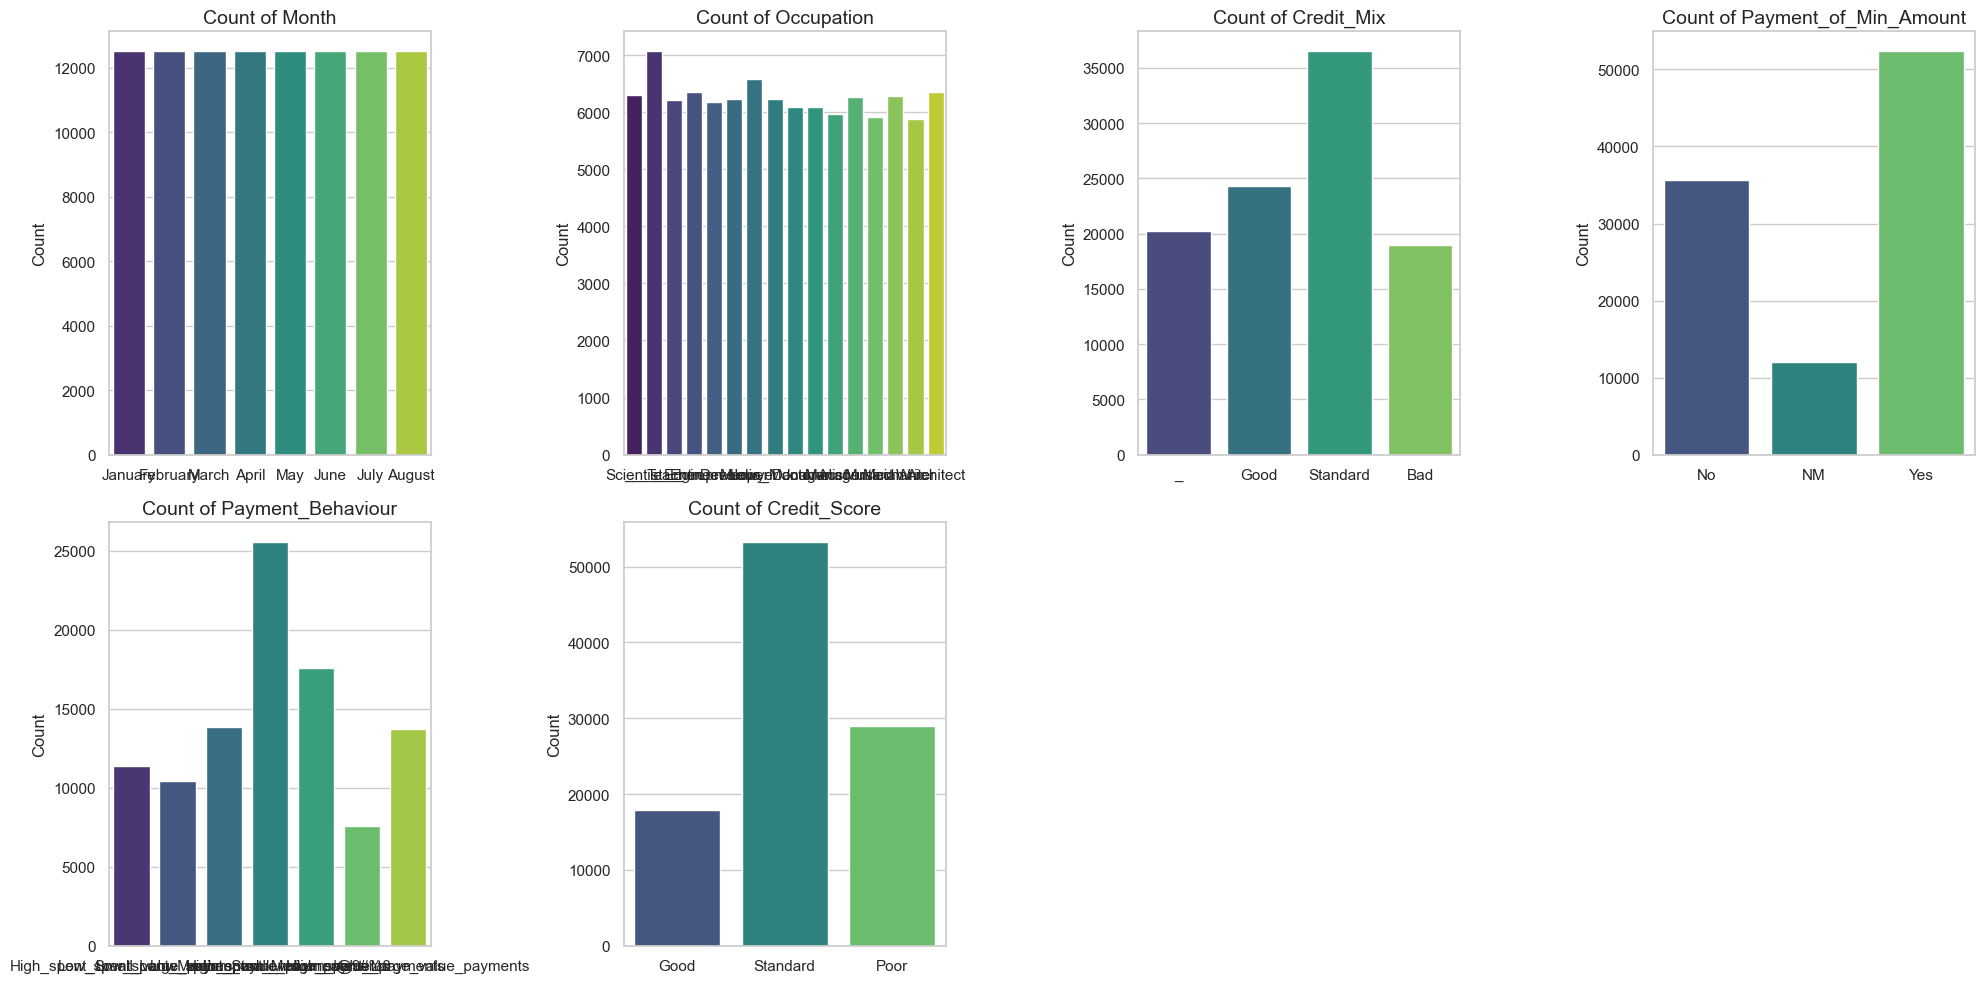

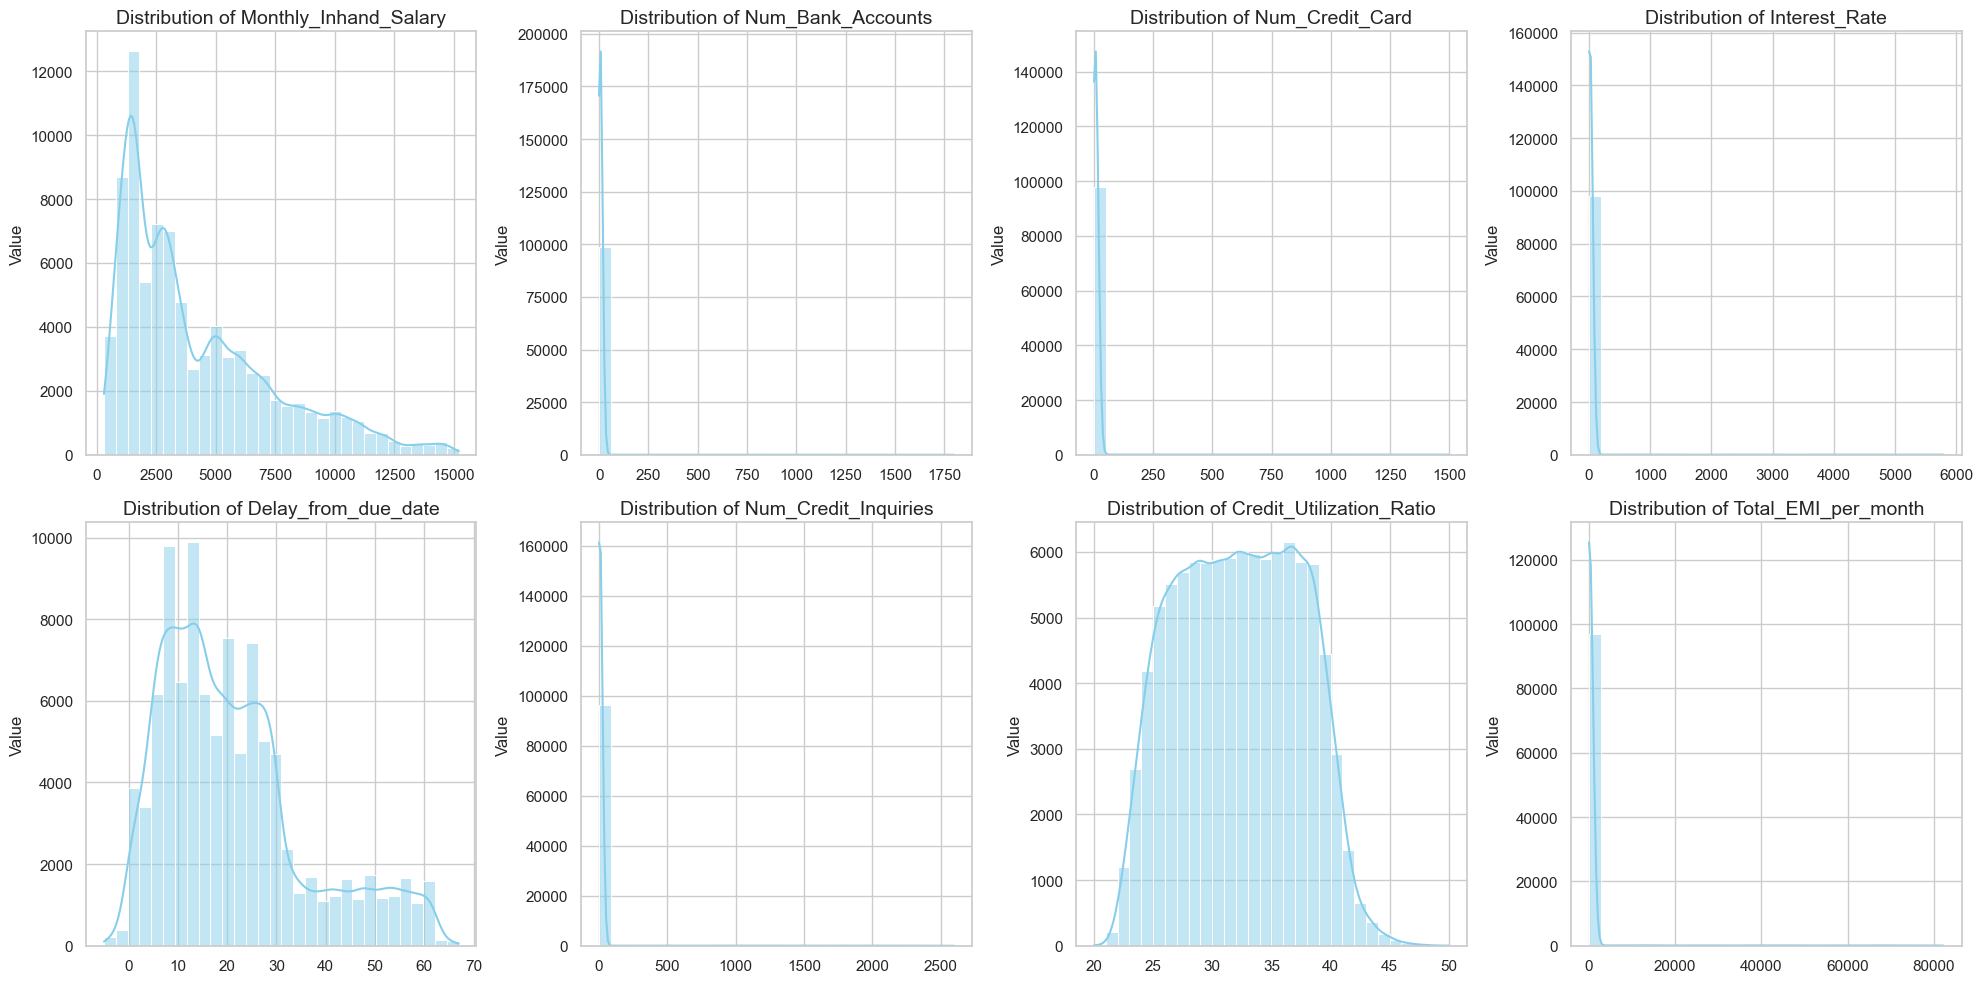

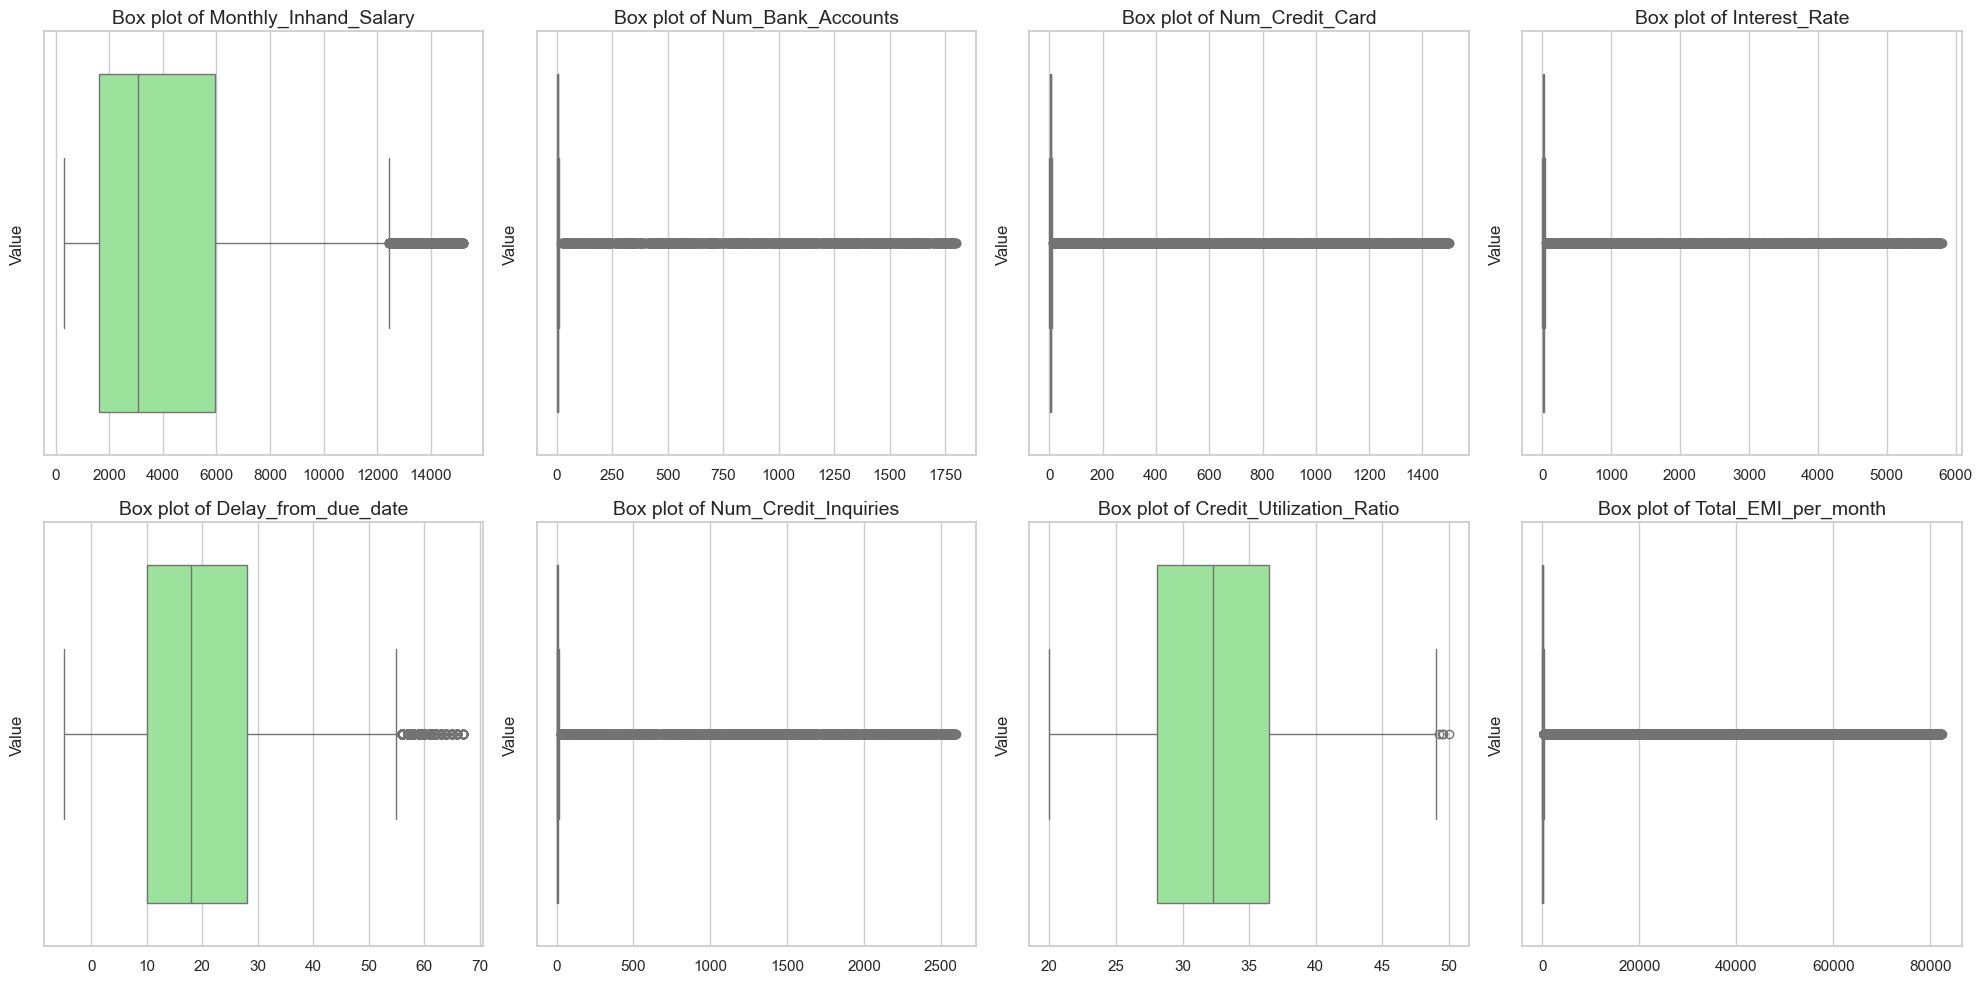

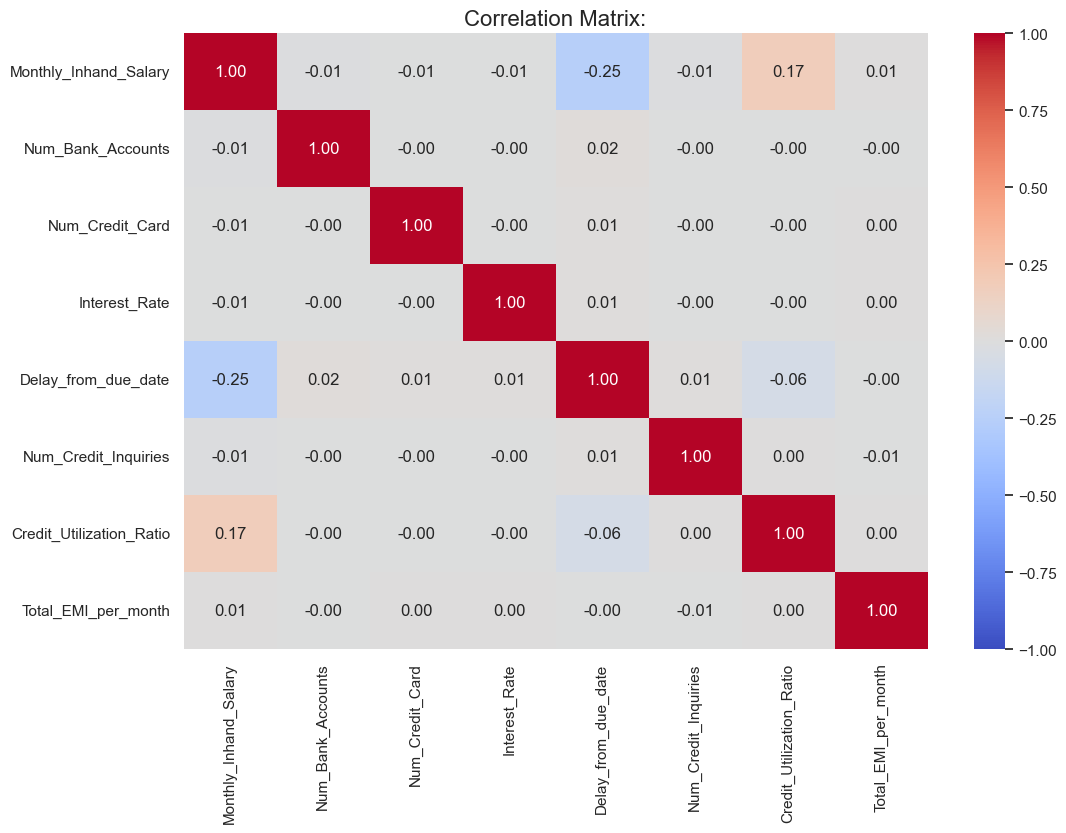

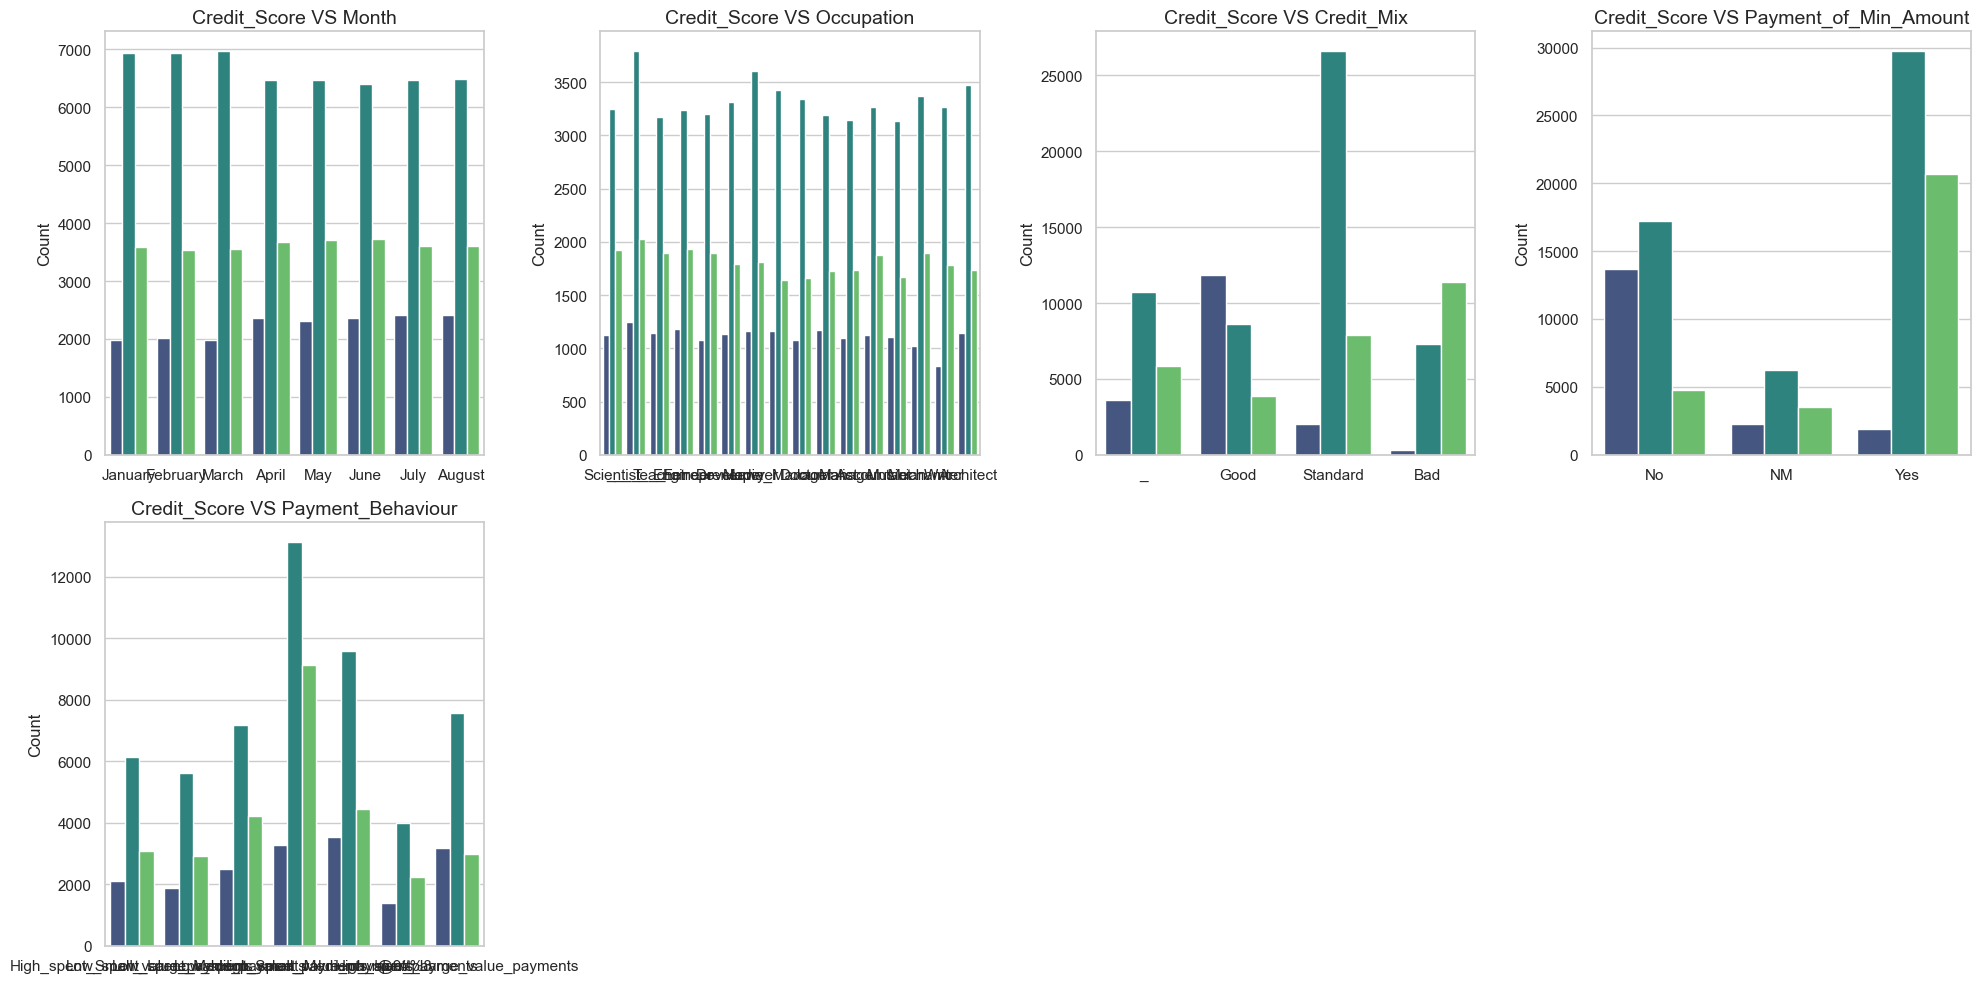

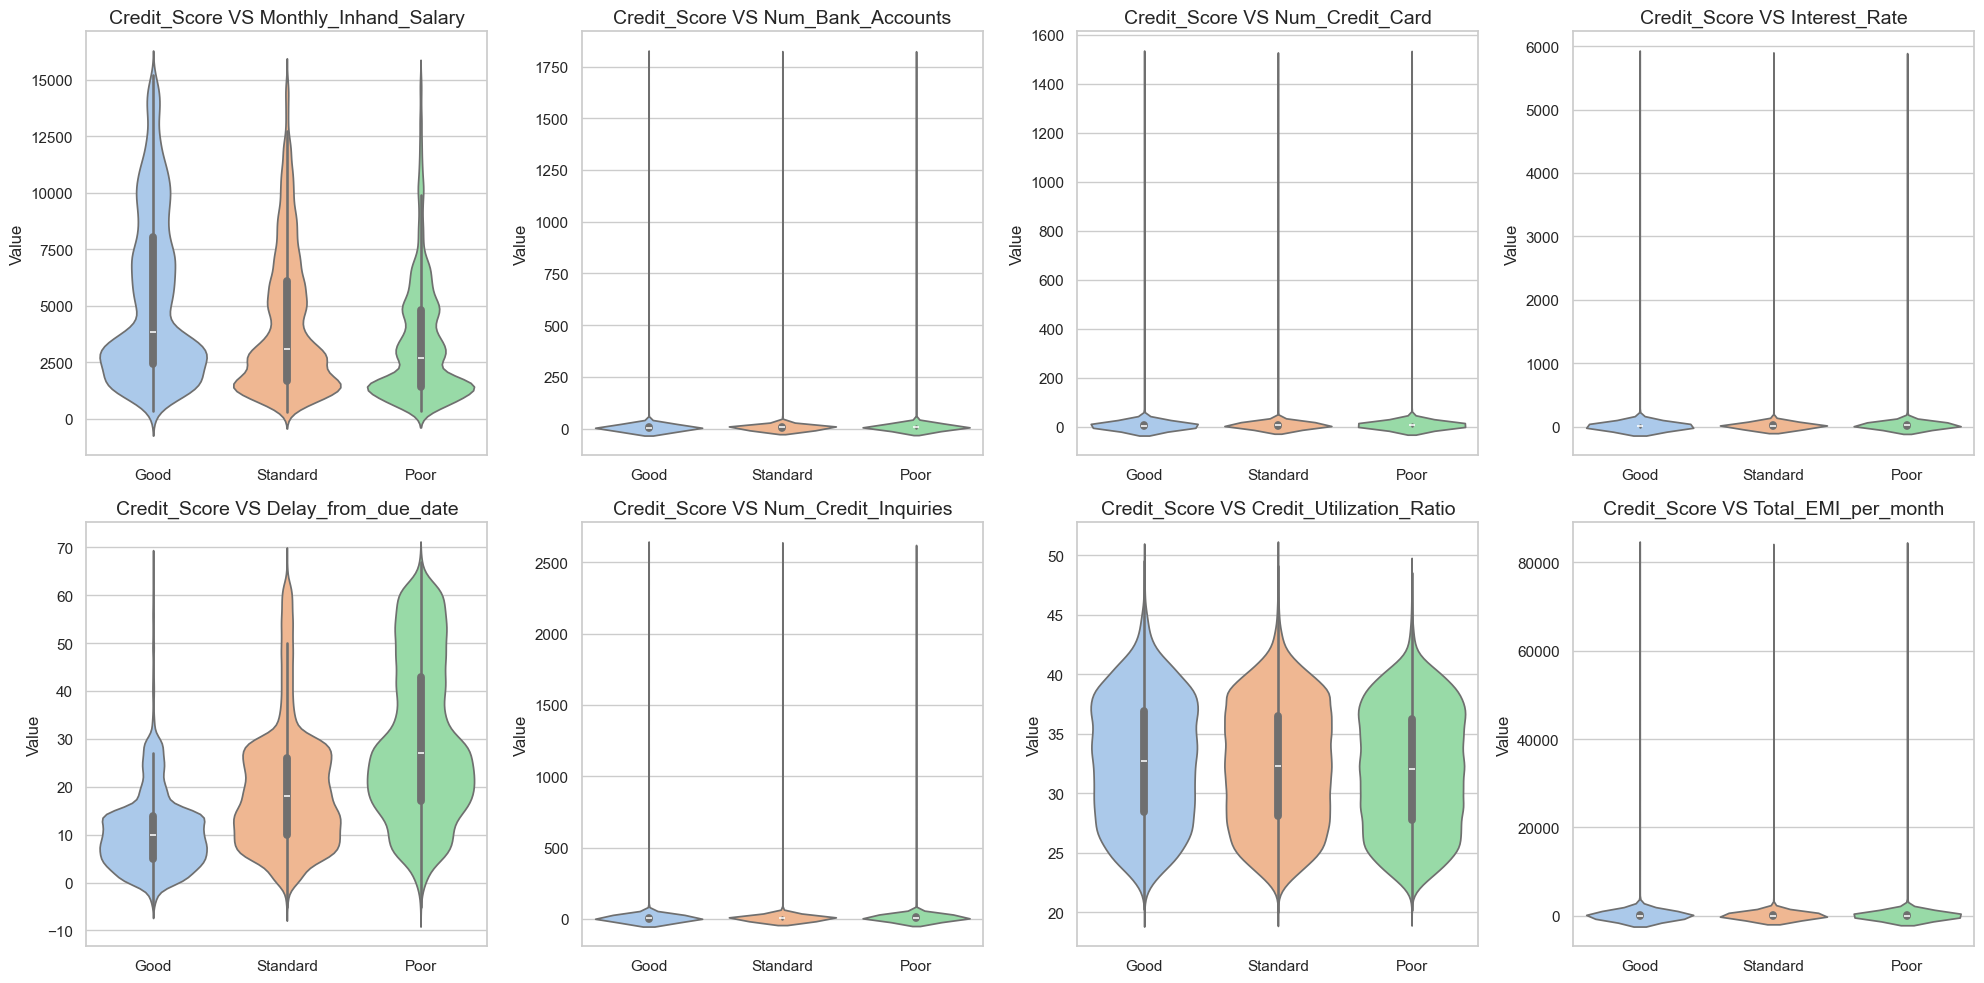

In [5]:
raw_data = pd.read_csv('Data/train-2.csv', low_memory=False)

raw_EDA = EDA(raw_data)
raw_EDA.perform_EDA()

<div style="height: 5px; background: #DA70D6; border-radius: 1px; margin: 1px 0; position: relative;">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: rgba(255, 255, 255, 0.3); border-radius: 1px; box-shadow: inset 0 0 10px rgba(255, 255, 255, 0.8);"></div>
</div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    APLICACIÓN (DQR class & EDA class a "clean_data")
</div>


Head:
   Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      3   23          12       19114.12            1824.843333   
1      2   23          12       19114.12            3093.745000   
2      6   33          12       19114.12            3093.745000   
3      0   23          12       19114.12            3093.745000   
4      7   23          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                       7                 11.27   
1                   -1         

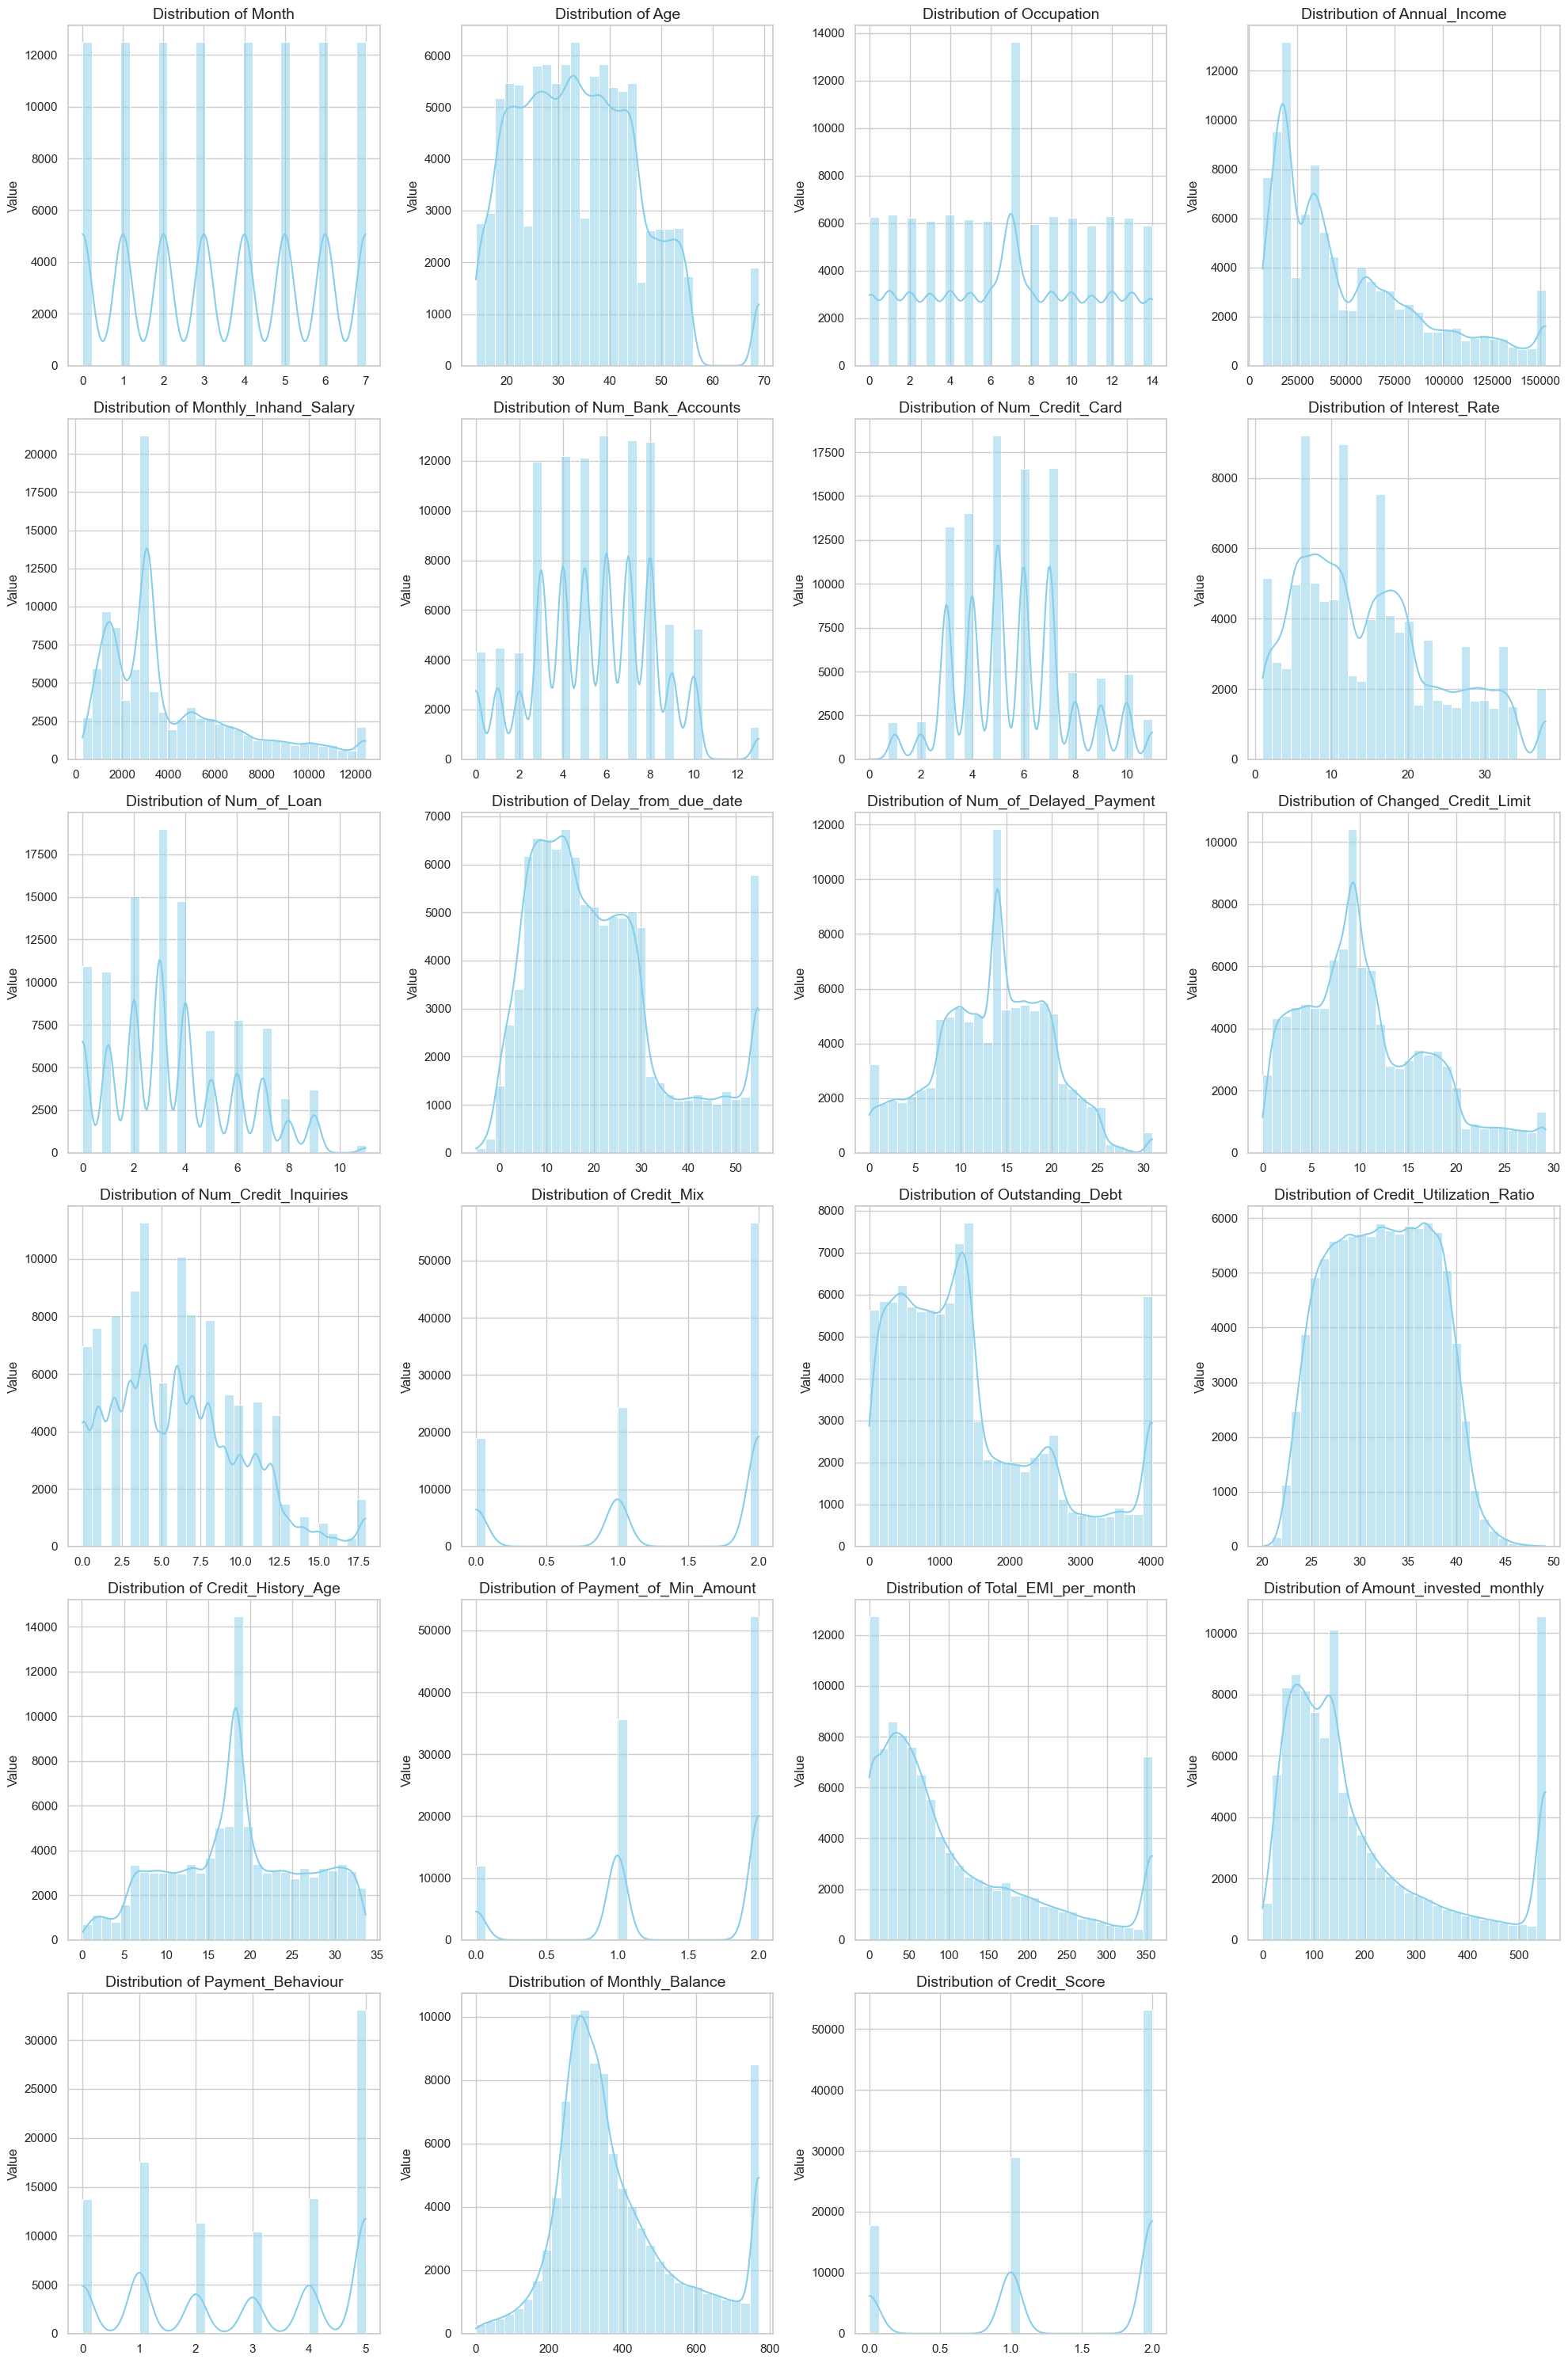

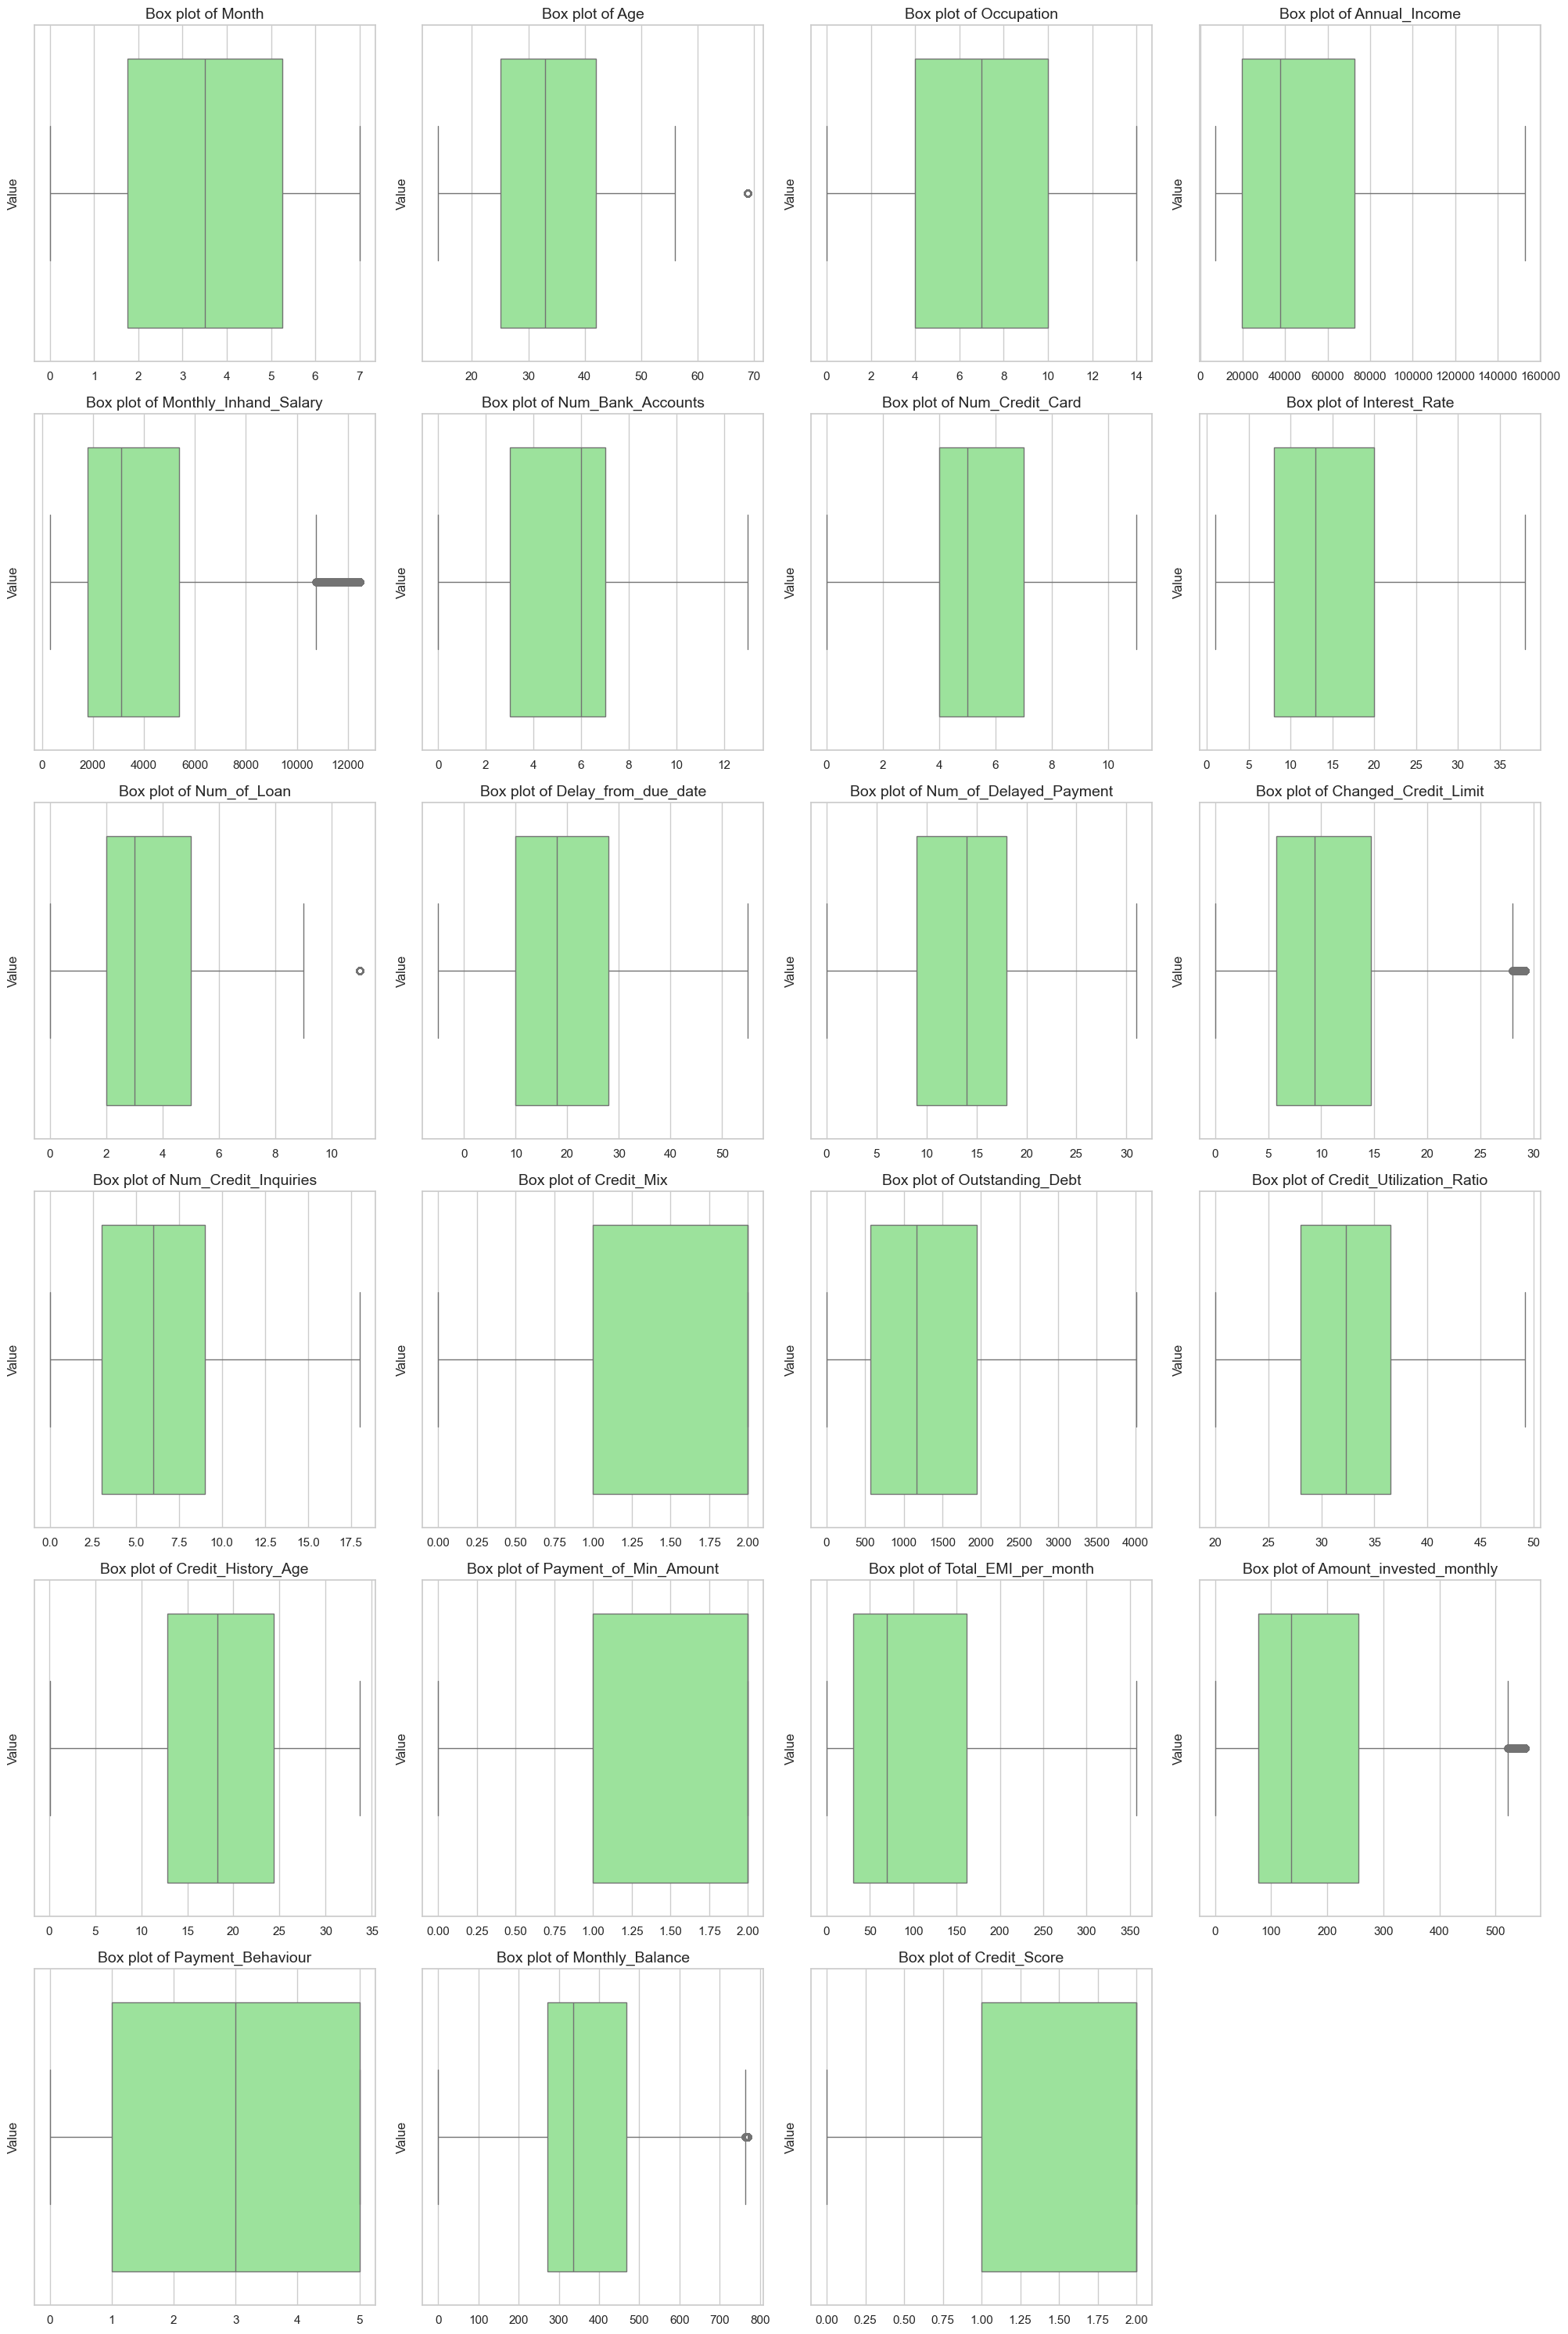

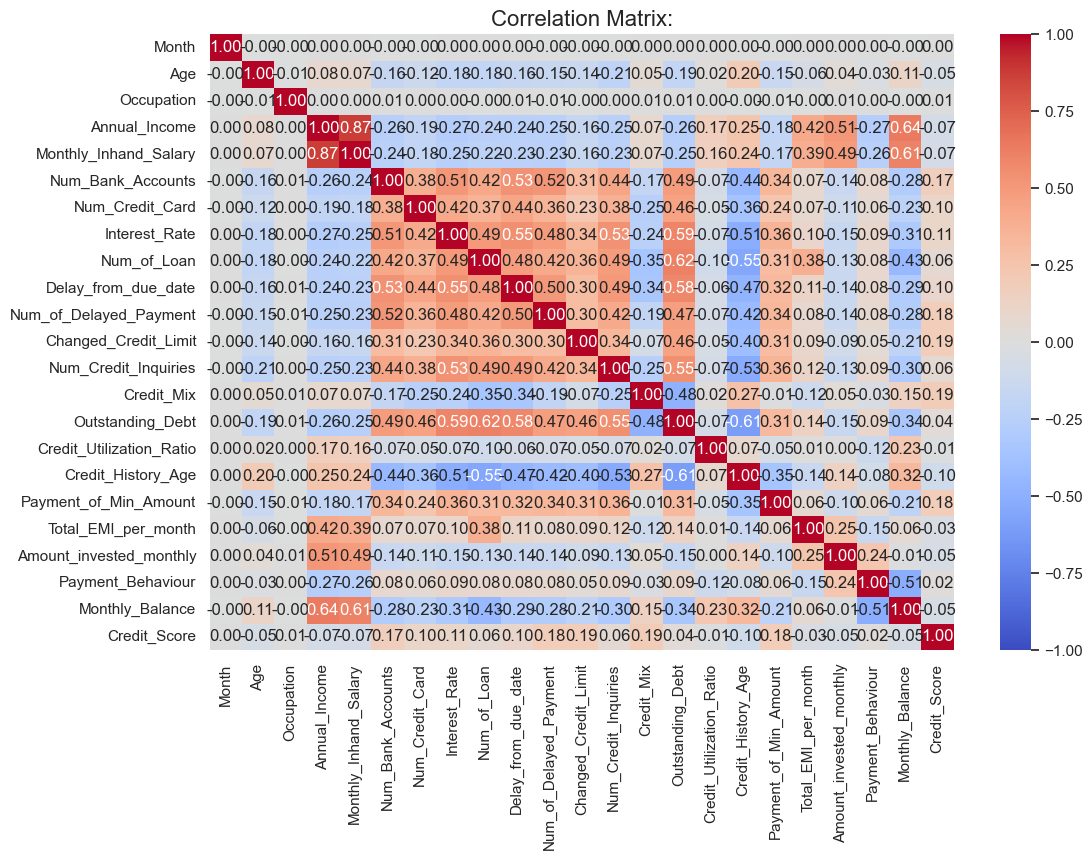

No rows to plot.


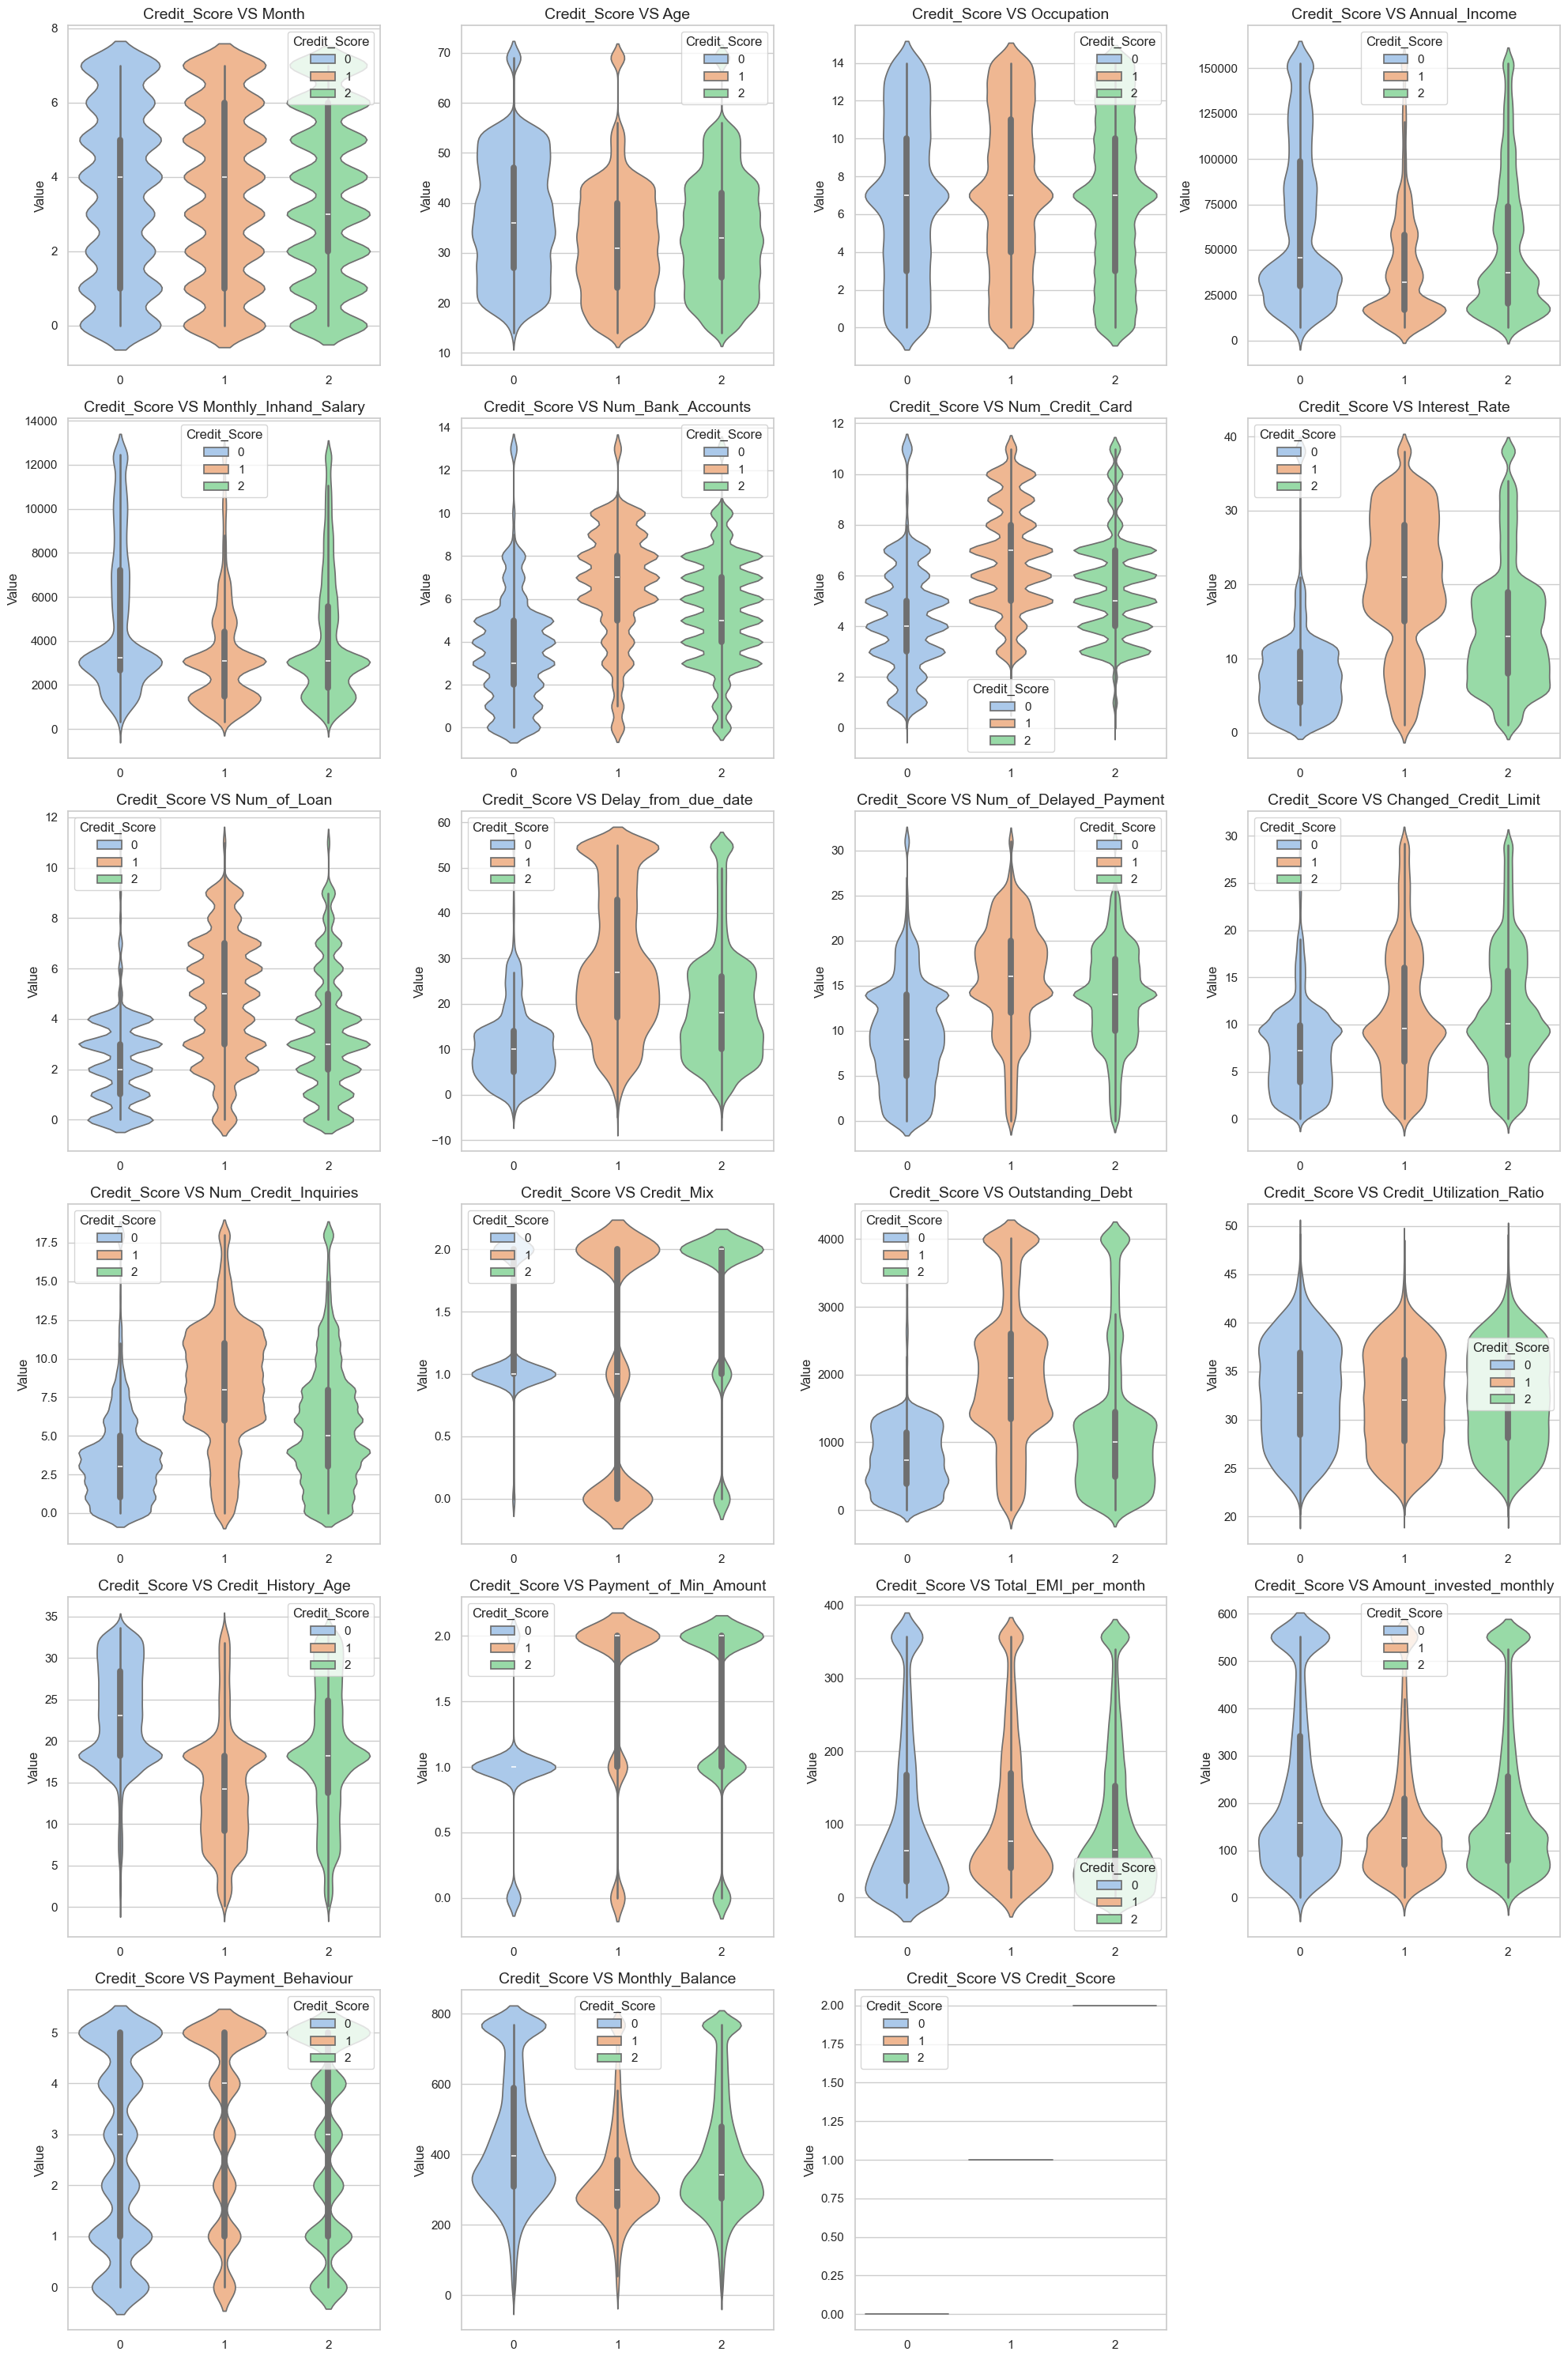

In [6]:
DQR = DQR(raw_data)
clean_data = DQR.perform_clean()

clean_EDA = EDA(clean_data)
clean_EDA.perform_EDA()

<div style="height: 5px; background: #DA70D6; border-radius: 1px; margin: 1px 0; position: relative;">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: rgba(255, 255, 255, 0.3); border-radius: 1px; box-shadow: inset 0 0 10px rgba(255, 255, 255, 0.8);"></div>
</div>

<div style="font-family: 'Pacifico', cursive; text-align: left; font-size: 30px; color: #DA70D6;
            text-shadow: 2px 2px 0 #FFFFFF, 5px 5px 0 #000000, 10px 10px 0 #000000, 
                         0 0 20px #DA70D6, 0 0 30px #DA70D6, 0 0 40px #DA70D6, 0 0 50px #DA70D6,
                         0 0 60px #DA70D6, 0 0 70px #DA70D6;">
    APLICACIÓN (CSM class a "clean_data")
</div>

In [7]:
accuracy = CSM(clean_data)
accuracy.apply_scoring()

Accuracy: 53.34%


<div style="height: 5px; background: #DA70D6; box-shadow: 0 0 10px #DA70D6; margin: 20px 0;"></div>